import packages:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Build data

the shape of Y=(1000,)
w=[ 0.49088438 -0.69635043 -1.23457784  0.10822056  0.95032437  0.11478832
 -0.0345828   0.54729426  0.43418938 -0.51354237]


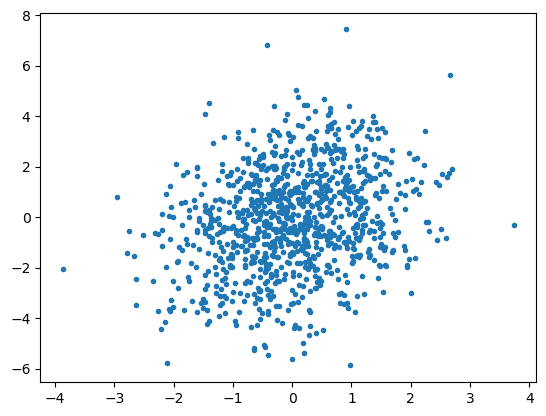

In [64]:
N = 1000
M = 10
X = np.random.randn(N, M)
noise = np.random.randn(N) * 0.1
beta = np.random.randn(M)
Y = X @ beta + noise

print(f'the shape of Y={Y.shape}')
print(f'w={beta}')
plt.plot(X[:, :1], Y, '.')

parameters:

In [24]:
max_iter = 50
lr_init = 0.1

helper functions that we need:

* compute gradient
* lr_schedule [optional]
* initialization [optional]

options to add:

* l2 regularization

In [ ]:
Class LinearReg():
    def __init__(self, max_iter=50, lr_init=0.1):
        self.max_iter = max_iter
        self.lr_init = lr_init 
        self.w = None
    def fit(self, X, Y):
        pass
    def predict(self, X):
        pass
    
    def _compute_gradient(self, X, Y, w):
        pass
        

## 1. Batch Gradient descent

In [44]:
def lr_schedule(lr_init, n_iter):
    return lr_init / 10 ** int(n_iter / 100)

In [36]:
def compute_gradient(X, Y, w):
    error = X @ w - Y
    return 2 * error @ X / X.shape[0]

In [23]:
compute_gradient(X, Y, beta)

array([-0.00870409, -0.00130888])

In [49]:
max_iter = 100
lr_init = 0.1
n_data, n_feat = X.shape
w = np.random.randn(n_feat)  # todo: replace with a function that takes other options, too.
for n_iter in range(max_iter):
    lr = lr_schedule(lr_init, n_iter)  # todo: implemet
    grad_iter = compute_gradient(X, Y, w)  # todo: implemet
    w = w - lr * grad_iter
    # todo: early stopping
    

In [50]:
print(w)

print(beta)

[ 2.3428813  -2.77170132]
[ 2.34719422 -2.7712076 ]


### Final code:

In [65]:
class LinearReg():
    def __init__(self, max_iter=50, lr_init=0.1):
        self.max_iter = max_iter
        self.lr_init = lr_init 
        self.w = None
    def fit(self, X, Y):
        n_feat = X.shape[1]
        self.w = np.random.randn(n_feat)  # todo: replace with a function that takes other options, too.
        for n_iter in range(self.max_iter):
            lr = lr_schedule(self.lr_init, n_iter)  
            grad_iter = self._compute_gradient(X, Y) 
            self.w = self.w - lr * grad_iter
    def predict(self, X):
        if self.w is None:
            raise Exception('The model is not trained yet! consider using fit method.')
        return X @ self.w
    
    def _compute_gradient(self, X, Y):
        error = X @ self.w - Y
        return 2 * error @ X / X.shape[0]

def lr_schedule(lr_init, n_iter, iter1=100):
    return lr_init / 10 ** int(n_iter / iter1)

[ 0.4943322  -0.6982614  -1.24047399  0.10668258  0.949835    0.11146487
 -0.02915581  0.5483167   0.43425087 -0.51490629]
[ 0.49088438 -0.69635043 -1.23457784  0.10822056  0.95032437  0.11478832
 -0.0345828   0.54729426  0.43418938 -0.51354237]


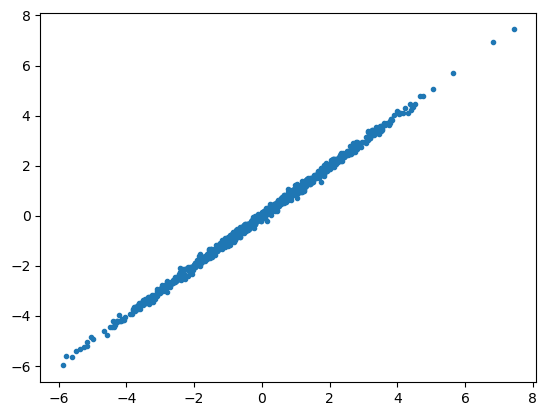

In [68]:
model = LinearReg()
model.fit(X, Y)
y_hat = model.predict(X)
print(model.w)
print(beta)
plt.plot(Y, y_hat, '.')